# Navigability

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from geopy.distance import geodesic
from scipy.optimize import curve_fit

In the breif I mentioned the conditions of navigability: 
- hidden metric space
- link length distribuion
- degree distribution
- clustering coefficient

The metric space I chose is the geolocation of the twitter users in miles. 

## Distributuion of link lenghts ##

To calculate the distances, I chose the geodesic distance with [geopy](https://geopy.readthedocs.io/en/stable/#module-geopy.distance).

In [2]:
def geodesic_distance(a, b):
    return geodesic(a, b).miles

The whole network is not connected so I needed to filter it, so I choose users with a minimum follower threshold.
Here I plot the distribution of link lenghts for those filtered networks.

In [3]:
# Import saved data
edges_1000 = pd.read_csv('edges_1000.csv')
edges_100 = pd.read_csv('edges_100.csv')
edges_500 = pd.read_csv('edges_500.csv')

In [4]:
# Calculate the distance counts
vals_500, counts_500 = np.unique(edges_500.distance.values, return_counts=True)
vals_100, counts_100 = np.unique(edges_100.distance.values, return_counts=True)
vals_1000, counts_1000 = np.unique(edges_1000.distance.values, return_counts=True)

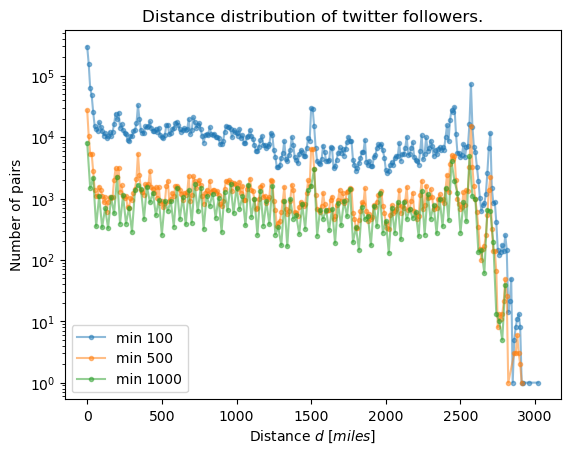

In [7]:
plt.plot(vals_100, counts_100, '.-', alpha = 0.5, label = 'min 100')
plt.plot(vals_500, counts_500, '.-', alpha = 0.5, label = 'min 500')
plt.plot(vals_1000, counts_1000, '.-', alpha = 0.5, label = 'min 1000')
plt.legend()
plt.yscale('log')
plt.ylabel('Number of pairs')
plt.xlabel('Distance $d~[miles]$')
plt.title('Distance distribution of twitter followers.')
plt.savefig('lenght_dist.png')
plt.show()

We can not find a clear $P(d) \sim 1/d$ power law on the filtered networks.

## Degree Distribution ##

The degree distribution $P(k)$ of a network is the fraction of nodes in the network with degree $k$. Real life network, such as the twitter users network tend to be scale-free, meaning their degree distribution
follows a power law $P(k) \sim k^{-1}$ where the $\gamma$ parameter is usually between 2 and 3. The Boguna paper states that the exponent should be above 2.6. Here I calculate it for the whole network,
assuming it will only go up in the filtered network.

In [8]:
# load graph object from file
graph = pickle.load(open(r'C:\Users\dajka\Documents\Egyetem\MSC\III\dsdatasci\data/US_twitter_network.pickle', 'rb'))

In [9]:
# Define power law for the fit
def power_law(x, b):
    return np.power(x, b)

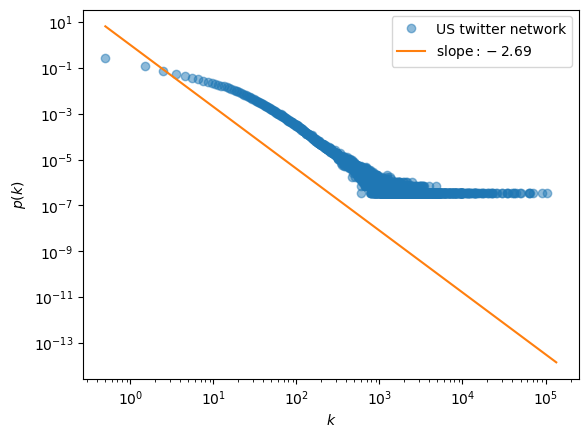

In [76]:
node_degrees = []
for node in graph.nodes:
    node_degrees.append(graph.degree(node))
    
max_k = max(node_degrees)
degree_bins = np.arange(0.5,max_k+0.5,1.0)

degree_dist, bins = np.histogram(node_degrees,degree_bins,density = True)

unique, counts = np.unique(node_degrees, return_counts=True)
pk = counts/len(node_degrees)

pars, cov = curve_fit(f=power_law, xdata=unique, ydata=pk)

stdevs = np.sqrt(np.diag(cov))

plt.clf()
plt.loglog(bins[:-1], degree_dist, 'o', alpha = 0.5, label = 'US twitter network')
plt.loglog(bins[:-1], power_law(bins[:-1], *pars), label = 'slope$ : -2.69 $')
plt.legend()
plt.xlabel('$Degree$')
plt.ylabel('$P(k)$')
plt.savefig('degree_dist.png')
plt.show()

## Clustering ##

The local clustering coefficient $C(v)$ of vertex v is a measure of how close $v$'s neighbours are to being a clique, formally $ C(v) = \frac{e(v)}{k_v(k_v-1)/2}$ where $e(v)$
denotes the number of edeges between the vertices in the $v$''s neighourhood. Per the Boguna article, the ideal value is $C > 0.36$. The clustering in our networks are:

| network | clustering |
| --- | --- |
| min 100 followers | 0.14 |
| min 500 followers | 0.26 |
| min 1000 followers | 0.3599 |

We can see that the network with the heaviest fiktering barelly makes the threshold here.